In order to make a model capable of receiving an wider range of inputs and continue accurately pronosticate results, the dataset used to train the model can be augmented.

Using a technique called "Data Augmentation". Data Augmentation studies the values for certain features of our model and
attempts to generate similar values which still accurate and relevant to the classes these features represent.

In this case Principal Component Analysis (PCA) will be used to produce these new values. PCA allow us to determinate the variance of the data.

The following process will show how to determine the variance of values for 2 features in the dataset.

In [29]:
import numpy as np
import matplotlib.pylab as plt

from sklearn import decomposition

feats = np.load("./features.npy")[:,:2]
label = np.load("./labels.npy")
idx = np.where(y != 0)
feats = feats[idx]
feats[:,0] -= feats[:,0].mean()
feats[:,1] -= feats[:,1].mean()

Now with our 2 set of features arranged, lets calculate their variance ratio

In [30]:
pca = decomposition.PCA(n_components=2)
pca.fit(feats)
variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)

[0.87221781 0.12778219]


Lets draw a plot for these features were the variance can be illustrated among other values

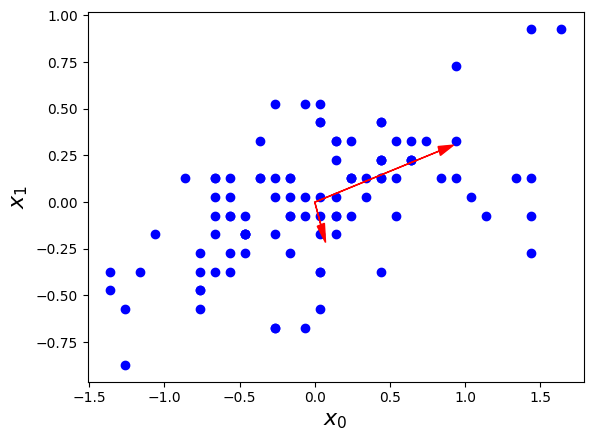

In [31]:
ax = plt.axes()
plt.scatter(x[:,0], x[:,1], marker='o', color='b')

x0 = variance_ratio[0] * pca.components_[0,0]
y0 = variance_ratio[0] * pca.components_[0,1]
ax.arrow(0, 0, x0, y0, head_width=0.05, head_length=0.1, fc='r', ec='r')

x1 = variance_ratio[1]*pca.components_[1,0]
y1 = variance_ratio[1]*pca.components_[1,1]
ax.arrow(0, 0, x1, y1, head_width=0.05, head_length=0.1, fc='r', ec='r')

plt.xlabel("$x_0$", fontsize=16)
plt.ylabel("$x_1$", fontsize=16)

plt.show()